# CSV_3

In [1]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
import pandas as pd
music_df = pd.read_csv("features_3_sec.csv" ,na_values=["NaN", " "])
print(music_df.shape)
display(music_df)


(9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [5]:
# Remove rows with missing values
music_df.dropna(axis=0, inplace=True)

# Check for missing values
missing_values = music_df.isnull().sum()

# Print columns with missing values and their respective counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

print(music_df.shape)

Columns with Missing Values:
Series([], dtype: int64)
(9990, 60)


In [6]:
# Extract features (X) and labels (y)
x = music_df.drop(['label'], axis=1)  # Assuming 'label' is the column containing class labels
X = x.iloc[:, 1:]
y = music_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the DataFrames
print("X_train_scaled DataFrame:")
display(X_train_scaled_df)

print("\nX_test_scaled DataFrame:")
display(X_test_scaled_df)


X_train_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.273623,0.727546,0.162253,0.020880,0.462181,0.051678,0.628099,0.138211,0.554959,...,0.525206,0.035655,0.487629,0.040656,0.320900,0.026601,0.463339,0.061320,0.670180,0.124943
1,0.0,0.200835,0.722431,0.233701,0.110578,0.234705,0.036190,0.365876,0.062005,0.283952,...,0.399715,0.138657,0.289568,0.195525,0.401623,0.180360,0.488655,0.093865,0.487297,0.161731
2,0.0,0.531187,0.797091,0.609429,0.310584,0.540946,0.250980,0.868146,0.175978,0.747950,...,0.452979,0.047733,0.417351,0.102926,0.347425,0.061809,0.408620,0.014890,0.382657,0.049573
3,0.0,0.105534,0.710714,0.101233,0.005292,0.213692,0.019904,0.509037,0.052501,0.273259,...,0.639564,0.137372,0.388879,0.119418,0.177624,0.115570,0.526797,0.086740,0.461377,0.188193
4,0.0,0.300291,0.791582,0.221872,0.171633,0.381749,0.298816,0.632562,0.461824,0.490657,...,0.385568,0.103414,0.334851,0.061661,0.452621,0.064428,0.469873,0.027022,0.302144,0.085014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,0.0,0.232561,0.762759,0.219443,0.117742,0.385278,0.101954,0.624860,0.363997,0.516481,...,0.361823,0.044637,0.343232,0.060562,0.283500,0.028988,0.413191,0.019732,0.337172,0.069384
7988,0.0,0.201509,0.628763,0.091270,0.003336,0.185579,0.011046,0.395115,0.039332,0.264450,...,0.586871,0.064696,0.354153,0.019345,0.387703,0.014041,0.491369,0.019486,0.692447,0.147939
7989,0.0,0.188382,0.742198,0.187505,0.070445,0.147442,0.022333,0.240489,0.023351,0.203338,...,0.412123,0.111575,0.466218,0.073319,0.381883,0.076021,0.494171,0.035473,0.477229,0.104910
7990,0.0,0.388353,0.728236,0.242915,0.070321,0.209499,0.264402,0.369314,0.279896,0.253813,...,0.592729,0.104801,0.280728,0.246174,0.363916,0.054872,0.388265,0.050928,0.415506,0.030359



X_test_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.449989,0.772012,0.202143,0.019575,0.190181,0.096897,0.432013,0.185702,0.276373,...,0.547183,0.080034,0.338559,0.093698,0.377247,0.020590,0.394629,0.019861,0.396216,0.037228
1,0.0,0.194069,0.652902,0.201970,0.028512,0.147884,0.010029,0.284852,0.023778,0.210476,...,0.391525,0.035364,0.340800,0.041620,0.219801,0.017475,0.299011,0.039630,0.263347,0.013691
2,0.0,0.371712,0.673366,0.293521,0.036694,0.367201,0.038280,0.500184,0.108579,0.459383,...,0.485503,0.094528,0.336853,0.046367,0.286379,0.062249,0.314305,0.034305,0.393009,0.037573
3,0.0,0.423009,0.729716,0.337213,0.165009,0.118684,0.026635,0.331319,0.123406,0.162102,...,0.508430,0.088176,0.297954,0.095739,0.372051,0.036296,0.426896,0.036249,0.344422,0.019860
4,0.0,0.474132,0.607292,0.345348,0.046319,0.456982,0.016879,0.575128,0.011407,0.584442,...,0.658404,0.039509,0.354885,0.041044,0.423566,0.042813,0.309644,0.049756,0.466007,0.062340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.0,0.353861,0.727413,0.462426,0.131802,0.535930,0.137484,0.770800,0.121586,0.691462,...,0.475220,0.050394,0.470580,0.077828,0.412393,0.100276,0.513739,0.034167,0.488024,0.043911
1994,0.0,0.513577,0.718354,0.430184,0.289389,0.724419,0.272571,0.811458,0.091457,0.817749,...,0.473846,0.261033,0.491380,0.301554,0.390883,0.225630,0.534108,0.075479,0.458323,0.093919
1995,0.0,0.518758,0.682546,0.381506,0.203116,0.381456,0.055051,0.501564,0.040667,0.481117,...,0.516505,0.047138,0.378952,0.080607,0.556993,0.095746,0.430116,0.047003,0.347112,0.059117
1996,0.0,0.615798,0.596888,0.197189,0.094241,0.378640,0.205083,0.553382,0.259890,0.494494,...,0.531642,0.077620,0.365055,0.044838,0.379350,0.066414,0.354432,0.022358,0.472664,0.066491


In [7]:
n_components = 40   # Set the desired number of components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)


# Train a machine learning model (e.g., RandomForest) using the PCA-transformed features
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test set
predictions = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8628628628628628


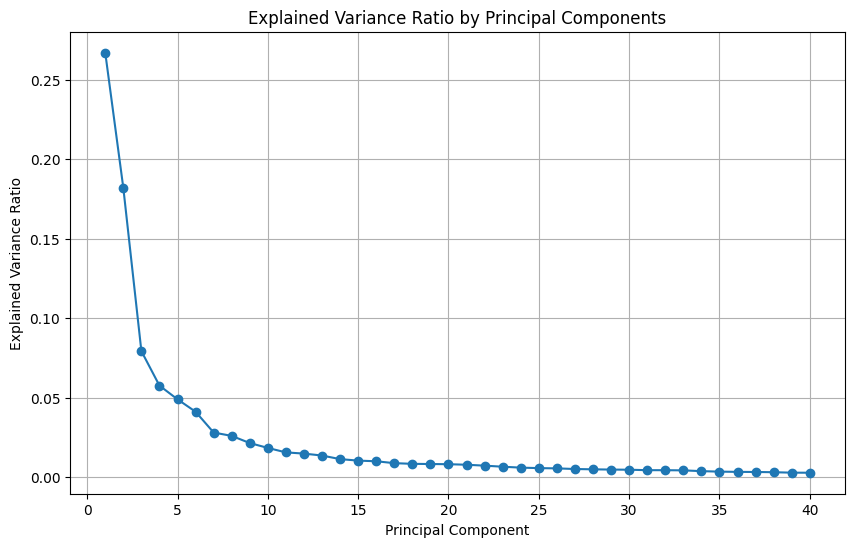

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explained Variance Ratio for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [9]:
# Train a RandomForestClassifier using PCA-transformed features
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_pca)

# calculate accuracy of random forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.8663663663663663


In [10]:
from sklearn.svm import SVC

# Train a SVM classifier using PCA-transformed features
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_pca)

# calculate accuracy of SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Classifier Accuracy:", svm_accuracy)

# Generate classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Generate confusion matrix
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Classifier Accuracy: 0.8733733733733734
SVM Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.87      0.88       208
   classical       0.88      0.97      0.92       203
     country       0.82      0.85      0.83       186
       disco       0.80      0.83      0.82       199
      hiphop       0.93      0.85      0.89       218
        jazz       0.90      0.86      0.88       192
       metal       0.91      0.95      0.93       204
         pop       0.94      0.93      0.93       180
      reggae       0.89      0.88      0.88       211
        rock       0.79      0.75      0.77       197

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998

SVM Confusion Matrix:
[[181   1   8   4   1   6   1   0   2   4]
 [  0 196   0   0   0   6   0   0   1   0]
 [  8   1 159   2   0   3   0   2   2   9]
 [  2   3   1 165  

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier using PCA-transformed features

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test_pca)

# calculate accuracy of KNN classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Classifier Accuracy:", knn_accuracy)

# Generate classification report
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Generate confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

KNN Classifier Accuracy: 0.9064064064064065
KNN Classification Report:
              precision    recall  f1-score   support

       blues       0.93      0.91      0.92       208
   classical       0.90      0.97      0.93       203
     country       0.81      0.89      0.85       186
       disco       0.88      0.92      0.90       199
      hiphop       0.94      0.87      0.90       218
        jazz       0.89      0.89      0.89       192
       metal       0.98      0.97      0.98       204
         pop       0.94      0.89      0.92       180
      reggae       0.92      0.92      0.92       211
        rock       0.88      0.83      0.86       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998

KNN Confusion Matrix:
[[190   1   7   0   1   5   0   0   2   2]
 [  0 197   0   0   0   6   0   0   0   0]
 [  3   1 165   2   0   5   0   0   3   7]
 [  2   4   3 183  

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply Linear Discriminant Analysis (LDA) to the scaled training data
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [13]:

# Train a RandomForestClassifier using LDA-transformed features
rf_lda_model = RandomForestClassifier()
rf_lda_model.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test set using RandomForestClassifier
rf_lda_predictions = rf_lda_model.predict(X_test_lda)

# Evaluate the RandomForestClassifier with LDA-transformed features
rf_lda_accuracy = accuracy_score(y_test, rf_lda_predictions)
print("Random Forest Classifier Accuracy with LDA:", rf_lda_accuracy)

# Train a SVM classifier using LDA-transformed features
svm_lda_model = SVC()
svm_lda_model.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test set using SVM classifier
svm_lda_predictions = svm_lda_model.predict(X_test_lda)

# Evaluate the SVM classifier with LDA-transformed features
svm_lda_accuracy = accuracy_score(y_test, svm_lda_predictions)
print("SVM Classifier Accuracy with LDA:", svm_lda_accuracy)

# Train a KNN classifier using LDA-transformed features
knn_lda_model = KNeighborsClassifier()
knn_lda_model.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test set using KNN classifier
knn_lda_predictions = knn_lda_model.predict(X_test_lda)

# Evaluate the KNN classifier with LDA-transformed features
knn_lda_accuracy = accuracy_score(y_test, knn_lda_predictions)
print("KNN Classifier Accuracy with LDA:", knn_lda_accuracy)


Random Forest Classifier Accuracy with LDA: 0.7782782782782782
SVM Classifier Accuracy with LDA: 0.7652652652652653
KNN Classifier Accuracy with LDA: 0.7972972972972973
